In [1]:
import geopandas as gpd
import fiona

In [2]:
gpd.__version__

'0.7.0+52.gc086056'

In [3]:
path = '/Users/martin/Dropbox/Academia/Data/Geo/Amsterdam/raw/bag3d_2020-01-25.gpkg'

In [4]:
fiona.listlayers(path)

['pand3d']

In [5]:
mask = gpd.read_file('/Users/martin/Dropbox/Academia/Data/Geo/Amsterdam/data.gpkg', layer='boundary')

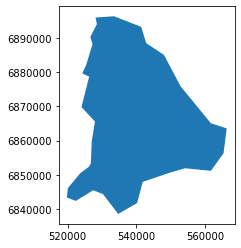

In [22]:
mask.plot()

In [6]:
amsterdam = gpd.read_file(path, mask=mask)

In [7]:
amsterdam.shape

(415178, 37)

In [12]:
amsterdam.head()

,identificatie,aanduidingrecordinactief,aanduidingrecordcorrectie,officieel,inonderzoek,documentnummer,documentdatum,bouwjaar,begindatumtijdvakgeldigheid,einddatumtijdvakgeldigheid,...,roof-0.99,rmse-0.99,roof_flat,nr_ground_pts,nr_roof_pts,ahn_file_date,ahn_version,height_valid,tile_id,geometry
0,0384100000003464,False,0,False,False,GD10.00424,2010-11-02,1980-01-01,None,None,...,4.59,0.34,True,50,1218,None,3,True,25hn1,"POLYGON Z ((130331.253 483337.251 0.000, 13033..."
1,0384100000003889,False,0,False,False,GD10.00424,2010-11-02,1980-01-01,None,None,...,3.43,0.46,True,82,869,None,3,True,25hn1,"POLYGON Z ((130374.022 483428.300 0.000, 13038..."
2,0305100000000149,False,0,False,False,10/formalisering25/0,2010-05-25,1980-01-01,None,None,...,3.80,0.87,False,89,2542,None,3,True,25gz1,"POLYGON Z ((124352.680 476826.680 0.000, 12432..."
3,0305100000000097,False,0,False,False,2011BAG0008,2011-03-28,1993-01-01,None,None,...,5.67,1.23,False,122,13611,None,3,True,25gz1,"POLYGON Z ((123803.120 476872.458 0.000, 12379..."
4,0305100000000150,False,0,False,False,10/formalisering25/0,2010-05-25,1882-01-01,None,None,...,7.19,1.19,False,40,4255,None,3,True,25gz1,"POLYGON Z ((124354.600 476868.600 0.000, 12434..."


In [13]:
filt = amsterdam.geometry.area > 30

In [14]:
filt.sum()

275132

In [8]:
amsterdam.to_file('/Users/martin/Dropbox/Academia/Data/Geo/Amsterdam/data.gpkg', layer='3dbag', driver='GPKG')